Datos generados para Polleria
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 141.5490
Epoch 2/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4987
Epoch 3/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4947
Epoch 4/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4990
Epoch 5/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4991 
Epoch 6/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4984
Epoch 7/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5018
Epoch 8/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5056 
Epoch 9/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4982 
Epoch 10/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4954
Epoch 11/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5003
Epoch 12/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4942
Epoch 13/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5046
Epoch 14/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4955 
Epoch 15/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4992 
Epoch 16/50
39/39 ━━━━━

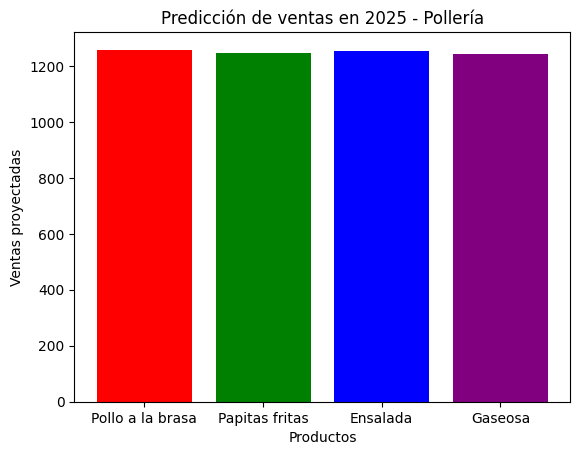

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
np.random.seed(1234)
def generar_datos_ventas(nombre_empresa, productos, start, end):
  meses = pd.date_range(start=start, end=end, freq='B')
  datos_ventas = pd.DataFrame({
    'Meses': meses,
    **{producto: np.random.randint(500, 2000, size=len(meses)) for producto in productos} #error (2000, 500) estaba inverso
  })
  datos_ventas.to_csv(f'/content/{nombre_empresa}.csv', index=False) #error (falta index=False)
  print(f'Datos generados para {nombre_empresa}')
empresa = 'Polleria'
productos = ['Pollo a la brasa', 'Papitas fritas', 'Ensalada', 'Gaseosa']
generar_datos_ventas(empresa, productos, '2020-01-01', '2024-09-30')
datos_polleria = pd.read_csv('/content/Polleria.csv') #error ('/wrong_path/Polleria.csv') no es la ruta del archivo
productos = ['Pollo a la brasa', 'Papitas fritas', 'Ensalada', 'Gaseosa'] #error [..., 'Jugo'] es incorrecto, es 'Gaseosa'
X_polleria = np.arange(len(datos_polleria)).reshape(-1, 1) #error (X_polleria = datos_polleria['Meses'].values.reshape(-1, 1)) no procesan bien directamente las fechas
Y_polleria = datos_polleria[productos].values
scaler = MinMaxScaler(feature_range=(-1, 1))
Y_polleria_scaled = scaler.fit_transform(Y_polleria)
modelo_polleria = Sequential()
modelo_polleria.add(Dense(32, activation='relu', input_shape=(1,))) #error (input_shape=(2,)) cambiar a 1 porque la entrada son índices de fechas
modelo_polleria.add(Dense(32, activation='relu'))
modelo_polleria.add(Dense(4))
modelo_polleria.compile(optimizer='sgd', loss='mean_absolute_error')
modelo_polleria.fit(X_polleria, Y_polleria_scaled, epochs=50, verbose=1)
meses_2025 = pd.date_range(start='2025-01-01', end='2025-12-31', freq='M')
X_2025 = np.arange(len(X_polleria), len(X_polleria) + len(meses_2025)).reshape(-1, 1)
predicciones_polleria_scaled = modelo_polleria.predict(X_2025)
predicciones_polleria = scaler.inverse_transform(predicciones_polleria_scaled)
ventas_2025 = predicciones_polleria[10]
plt.bar(productos, ventas_2025, color=['red', 'green', 'blue', 'purple'])
plt.title('Predicción de ventas en 2025 - Pollería')
plt.ylabel('Ventas proyectadas')
plt.xlabel('Productos')
plt.show()